<a href="https://colab.research.google.com/github/Ashisht2238/Python-Task-09-13/blob/main/Task_No_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [2]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
# Reshape for fully connected models
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

In [4]:
from tensorflow.keras import models, layers

# Create a simple FCNN
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Reshape images for CNN
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1)

# CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Train the FCNN or CNN model
history = model.fit(x_train_flat, y_train, epochs=10, validation_split=0.1)  # FCNN
# OR
history = cnn_model.fit(x_train_cnn, y_train, epochs=10, validation_split=0.1)  # CNN

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8542 - loss: 0.5049 - val_accuracy: 0.9682 - val_loss: 0.1197
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9534 - loss: 0.1626 - val_accuracy: 0.9733 - val_loss: 0.0963
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9653 - loss: 0.1173 - val_accuracy: 0.9757 - val_loss: 0.0832
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9714 - loss: 0.0966 - val_accuracy: 0.9778 - val_loss: 0.0733
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0762 - val_accuracy: 0.9770 - val_loss: 0.0793
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9793 - loss: 0.0668 - val_accuracy: 0.9798 - val_loss: 0.0713
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0554 - val_accuracy: 0.9815 - val_loss: 0.0644
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9819 - loss: 0.0546

In [7]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test_flat, y_test)  # FCNN
# OR
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test)  # CNN
print(f"Test Accuracy: {test_acc:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0952
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9886 - loss: 0.0471
Test Accuracy: 0.99


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


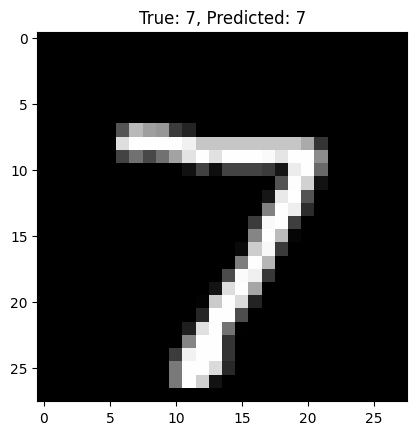

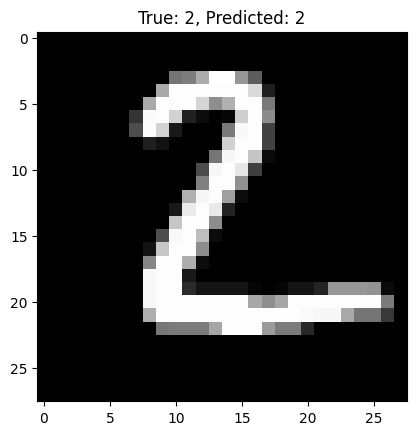

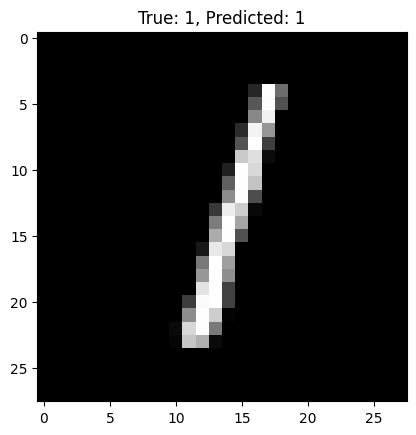

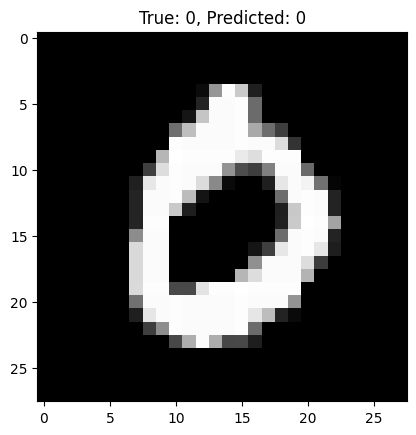

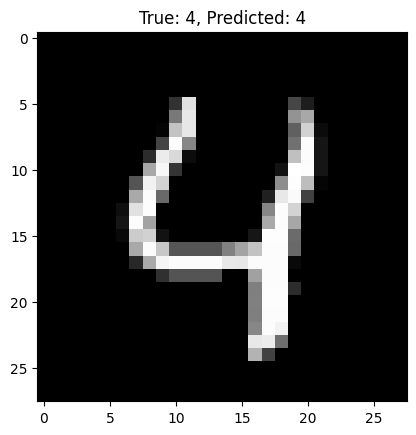

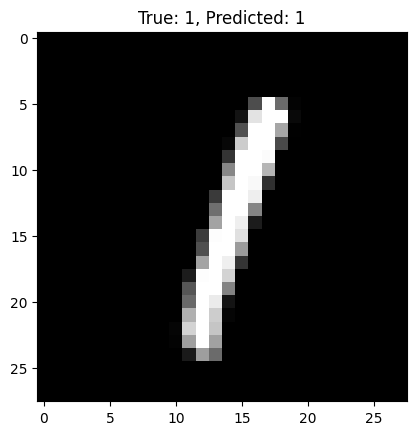

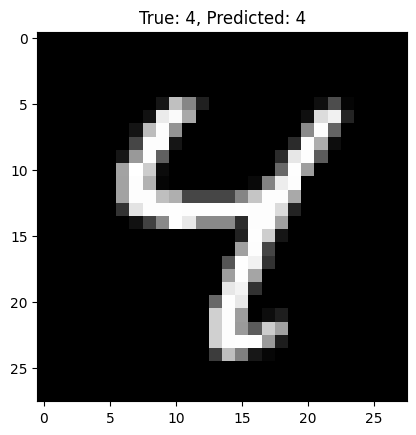

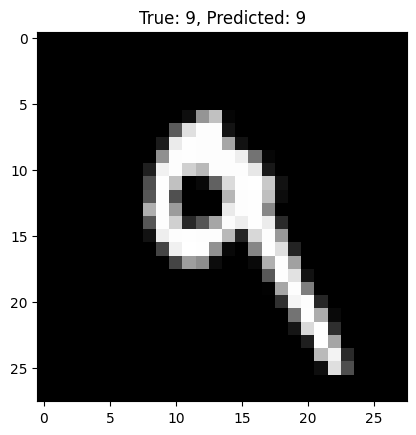

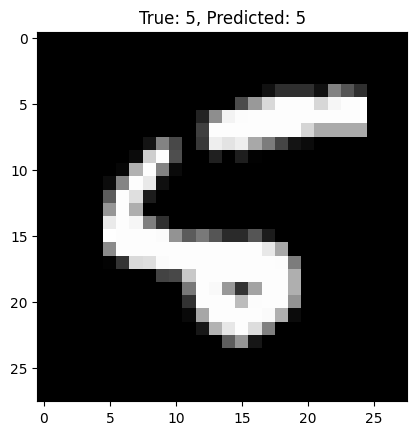

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Predict and visualize
predictions = model.predict(x_test_flat)  # FCNN
# OR
predictions = cnn_model.predict(x_test_cnn)  # CNN

# Show a few images
for i in range(9):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {np.argmax(predictions[i])}")
    plt.show()